Configure path envirorment

In [1]:
import sys
import os
sys.path.append(os.getcwd()[:-4])

Import Libraries

In [2]:
import itertools
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from examples.function_otimizer import FunctionOtimizerPSO
plt.style.use('ggplot')

Defining Function to Otimize

In [3]:
def ackley_function(x):
    return - 20*np.exp(-0.2*np.sqrt(np.mean(np.square(x)))) \
           - np.exp(np.mean(np.cos(2*np.pi*x))) \
           + 20 + np.e

Visualizing the function

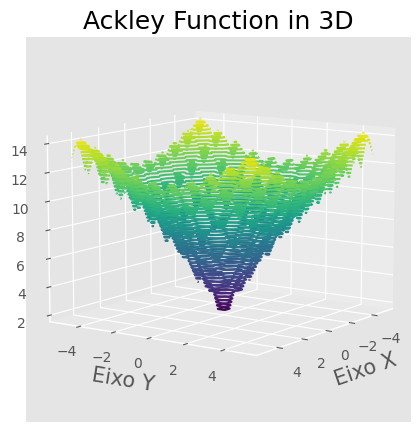

In [23]:
x = np.linspace(-5, 5, 30)
y = np.linspace(-5, 5, 30)
X, Y = np.meshgrid(x, y)
Z = np.copy(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i][j] = ackley_function(np.array([X[i][j], Y[i][j]]))

fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50)
ax.set_title('Ackley Function in 3D', fontsize=18)
ax.set_xlabel('Eixo X', fontsize=15)
ax.set_ylabel('Eixo Y', fontsize=15)
ax.set_zlabel('Eixo Z', fontsize=15)
ax.view_init(10, 35)
plt.show()

### Grid Search with the params:
- inertia: [0.8, 1, 1.2]
- social: [0.25, 0.5, 0.25]
- cognitive: [0.75, 0.5, 0.25]

In [ ]:
params = {
    "n_particles" : 50,
    "n_dim" : 3,
    "velocity_range" : (-0.5, 0.5),
    "position_range" : (-5, 5),
    "inertia" : 0.1,
    "cognitive" : 0.4,
    "social" : 0.6,
    "otimizer" : np.argmin,
    "n_generations" : 100,
    "function" : ackley_function
}

inertia = [0.8, 1, 1.2]
social = [0.25, 0.5, 0.75]
cognitive = [0.75, 0.25, 0.5]
combinations = itertools.product(inertia, social, cognitive)

results = list()
for i,s,c in tqdm(combinations):
    params['inertia'] = i
    params['social'] = s
    params['cognitive'] = c

    model = FunctionOtimizerPSO(**params)
    params['best_fitness'], _ = model.simulate()
    
    results.append(params.copy())
    del params['best_fitness']

In [6]:
df = pd.DataFrame(results)
df.sort_values(by='best_fitness',ascending=True,inplace=True)
print("Best result and parameters:")
best = df.iloc[0]
best

Best result and parameters:


n_particles                                                 50
n_dim                                                        3
velocity_range                                     (-0.5, 0.5)
position_range                                         (-5, 5)
inertia                                                    0.8
cognitive                                                 0.75
social                                                    0.75
otimizer                   <function argmin at 0x7f1ba41adda0>
n_generations                                              100
function          <function ackley_function at 0x7f1b5ef51260>
best_fitness                                               0.0
Name: 6, dtype: object

Creating the swarm particle model with best params

In [7]:
params = {
    "n_particles" : 50,
    "n_dim" : 3,
    "velocity_range" : (-0.5, 0.5),
    "position_range" : (-5, 5),
    "inertia" : best['inertia'],
    "cognitive" : best['cognitive'],
    "social" : best['social'],
    "otimizer" : np.argmin,
    "n_generations" : 100,
    "function" : ackley_function
}

model = FunctionOtimizerPSO(**params)

model.simulate()

Melhor resultado: 0.0009850631229082474
Melhor caminho: [ 0.00015857 -0.00021665 -0.00032981]


(np.float64(0.0009850631229082474),
 array([ 0.00015857, -0.00021665, -0.00032981]))

Running the Optimization for ten steps

In [8]:
steps = 10
fitness_evolution = [] # Best fitness evolution for executions
history_individuals = [] # Mantain all the history ants from last execution
for i in range(steps):
    _, best_individual = model.simulate()
    fitness_evolution.append([min(model.fitness(generation)) for generation in model.history_particles])
    history_individuals = np.array(model.history_particles)

fitness_evolution = np.array(fitness_evolution)
print('Individual:', best_individual)
print('Best result:', model.fitness([best_individual])[0])

Melhor resultado: 0.0014751255673144392
Melhor caminho: [ 4.60734856e-04  6.36584802e-05 -4.33448826e-04]
Melhor resultado: 1.1938588291293684e-06
Melhor caminho: [ 1.36830960e-07 -4.99492716e-07  2.95278176e-08]
Melhor resultado: 0.09987808605072646
Melhor caminho: [ 0.03214898 -0.0045456   0.01099103]
Melhor resultado: 3.16630322925171e-05
Melhor caminho: [ 1.36420521e-05 -1.34794798e-06  1.24562348e-07]
Melhor resultado: 7.462999936125314e-05
Melhor caminho: [-2.94787641e-05  1.32171595e-05 -5.15022476e-07]
Melhor resultado: 1.9082330493525035e-06
Melhor caminho: [-7.04471210e-08 -8.20279646e-07 -7.24713427e-08]
Melhor resultado: 0.0006317963970876583
Melhor caminho: [ 1.01458120e-04 -6.41031479e-05  2.45209397e-04]
Melhor resultado: 9.761007172359726e-05
Melhor caminho: [-4.10690177e-05 -8.55082980e-06  5.45867152e-06]
Melhor resultado: 0.0011327571341728238
Melhor caminho: [-6.44953298e-05  2.47572731e-04  4.16675221e-04]
Melhor resultado: 2.947677689935091e-06
Melhor caminho: [-1

Visualizing the mean fitness and best fitness evolution for last execution

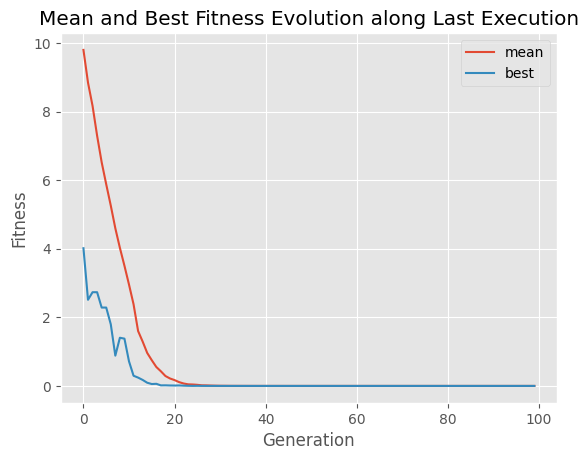

In [9]:
mean_fitness = np.array([np.mean(model.fitness(generation)) for generation in history_individuals])
max_fitness = np.array([np.min(model.fitness(generation)) for generation in history_individuals])

x = np.arange(mean_fitness.shape[0])
plt.plot(x,mean_fitness,label='mean')
plt.plot(x,max_fitness, label='best')
plt.title('Mean and Best Fitness Evolution along Last Execution')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
plt.show()

Visualizing Best Fitness Evolution for each execution

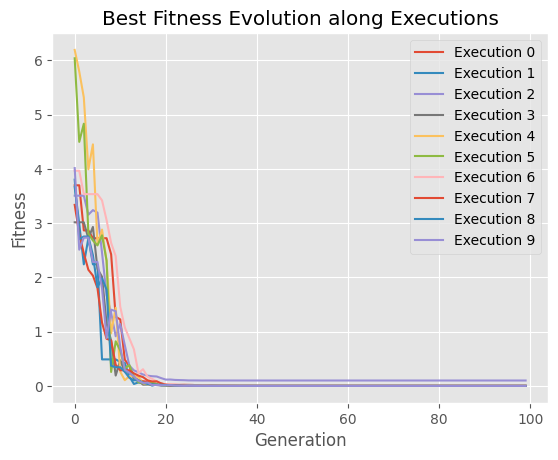

In [10]:
x = np.arange(fitness_evolution.shape[1])
for i,execution in enumerate(fitness_evolution):
    plt.plot(x, execution, label = f"Execution {i}")
plt.title('Best Fitness Evolution along Executions')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
plt.show()